In [1]:
import numpy as np
import os
import datetime
from astropy.io import fits
import xspec
from xspec import *
from xspec import AllModels, AllData, Fit, Plot

AllData.clear()
AllModels.clear()

basepathmod = '/mnt/c/Users/User/Downloads/chspec-main/'
AllModels.lmod('chspec', dirPath=basepathmod)
print("Model package chisoth successfully loaded.")




Model package chspec successfully loaded.
Model package chisoth successfully loaded.


In [11]:

import numpy as np
import os
import datetime
from astropy.io import fits
l1_pi_file="AL1_SOLEXS_20240212_SDD2_L1_2402120314_2402120439_512_puc_tb_goc.pi"





def solexs_genspec(l1_pi_file, tstart, tstop, outfile=None, clobber=True):
    spec_file = l1_pi_file
    hdul = fits.open(spec_file)
    hdu = fits.BinTableHDU.from_columns(hdul[1].columns)
    data = hdu.data

    # Filter the data based on tstart and tstop
    inds = (data['TSTART'] >= tstart) & (data['TSTART'] < tstop)
    data_f = data[inds]
    channel = data_f[0][3]
    n_ch = len(channel)
    spec_data = np.zeros(n_ch)
    stat_err = np.zeros(n_ch)
    sys_err = np.zeros(n_ch)
    exposure = 0

    # Populate the arrays
    for di in data_f:
        spec_data += di[4]  # Counts
        exposure += di[5]   # Exposure

    stat_err = np.sqrt(spec_data)

    
    hdu_list = []
    primary_hdu = fits.PrimaryHDU()
    hdu_list.append(primary_hdu)

    
    fits_columns = []
    col1 = fits.Column(name='CHANNEL', format='1J', array=channel)  
    col2 = fits.Column(name='COUNTS', format='1E', array=spec_data)  
    col3 = fits.Column(name='STAT_ERR', format='1E', array=stat_err) 
    col4 = fits.Column(name='SYS_ERR', format='1E', array=sys_err)   

    
    grouping = np.ones(n_ch, dtype=int)  
    quality = np.zeros(n_ch, dtype=int)  
    col5 = fits.Column(name='GROUPING', format='1I', array=grouping)
    col6 = fits.Column(name='QUALITY', format='1I', array=quality)

    fits_columns.extend([col1, col2, col3, col4, col5, col6])

    hdu_pha = fits.BinTableHDU.from_columns(fits.ColDefs(fits_columns))
    hdu_pha.name = 'SPECTRUM'

    # Add the necessary XSPEC header keywords
    hdu_pha.header.set('HDUCLASS', 'OGIP')
    hdu_pha.header.set('HDUCLAS1', 'SPECTRUM')
    hdu_pha.header.set('HDUCLAS2', 'TOTAL')
    hdu_pha.header.set('HDUCLAS3', 'COUNT')
    hdu_pha.header.set('HDUCLAS4', 'TYPE:I')
    hdu_pha.header.set('HDUVERS', '1.2.0')
    hdu_pha.header.set('PHAVERSN', '1992a')

    # Date, Time, and Mission Info
    hdu_pha.header.set('DATE-OBS', '2024-02-12 00:00:00.217564000')
    hdu_pha.header.set('DATE-END', '2024-02-12 23:59:59.934439000')
    hdu_pha.header.set('TIMESYS', 'UTC')
    hdu_pha.header.set('MJDREF', 57754.0)
    hdu_pha.header.set('TSTART', tstart)
    hdu_pha.header.set('TSTOP', tstop)
    hdu_pha.header.set('EXPOSURE', 30)

    # Instrument Information
    hdu_pha.header.set('TELESCOP', 'AL1')
    hdu_pha.header.set('INSTRUME', 'SOLEXS')
    hdu_pha.header.set('MISSION', 'AL1')
    hdu_pha.header.set('FILTER', 'SDD2')

    # Add DETECTOR Keywords
    hdu_pha.header.set('DETCOL', 'COUNT')  
    hdu_pha.header.set('DETECTOR', 'SPECTROMETER')  
    hdu_pha.header.set('DETSYSTEM', 'SPECTROMETER')  
    hdu_pha.header.set('DETCHANS', n_ch)  

    
    hdu_pha.header.set('POISSERR', False)


    hdu_pha.header.set('BACKFILE', 'NONE')  # No background file
    hdu_pha.header.set('RESPFILE', 'solexs_gaussian_SDD2_512.rmf')  
    hdu_pha.header.set('ANCRFILE', 'solexs_arf_SDD2.fits')  

    
    hdu_pha.header.set('AREASCAL', 1.0)  
    hdu_pha.header.set('BACKSCAL', 1.0)  

    hdu_list.append(hdu_pha)

    
    _hdu_list = fits.HDUList(hdu_list)

    try:
        _hdu_list.writeto(f'{outfile}.pha', overwrite=clobber)
        print(f"File saved as: {outfile}")
    except Exception as e:
        print(f"Error saving file: {e}")

#j=0
#tstart=1707689640
#tstop=1707689700
#oufile='spectra/Al1_spec'
time12=[]
#for start in range(int(tstart),int(tstop),60):
      #solexs_genspec(l1_pi_file, start, tstop=start+60,outfile=f'{oufile}_{j}')
      #time12.append((np.mean([start,start+60]))-1707689805)
      #j=1+j

j=0
tstart=1707689640             #1707689700
tstop=1707690420                        #1707689880
oufile='spectra/Al1_spec'
for start in range(int(tstart),int(tstop),30):
      solexs_genspec(l1_pi_file, start, tstop=start+30,outfile=f'{oufile}_{j}')
      time12.append((np.mean([start,start+30]))-1707689805)
      j=1+j




j=0
tstart=1707689640
tstop=1707689700
oufile='spectra/Al1_spec'
time12=[]
for start in range(int(tstart),int(tstop),60):
      solexs_genspec(l1_pi_file, start, tstop=start+60,outfile=f'{oufile}_{j}')
      time12.append((np.mean([start,start+60]))-1707689805)
      j=1+j

j=1
tstart=1707689700
tstop=1707689880
oufile='spectra/Al1_spec'
for start in range(int(tstart),int(tstop),30):
      solexs_genspec(l1_pi_file, start, tstop=start+30,outfile=f'{oufile}_{j}')
      time12.append((np.mean([start,start+30]))-1707689805)
      j=1+j
j=7
tstart=1707689880
tstop=1707690000
oufile='spectra/Al1_spec'
for start in range(int(tstart),int(tstop),60):
      solexs_genspec(l1_pi_file, start, tstop=start+60,outfile=f'{oufile}_{j}')
      time12.append((np.mean([start,start+60]))-1707689805)
      j=1+j
j=9
tstart=1707690000
tstop=1707690240
oufile='spectra/Al1_spec'
for start in range(int(tstart),int(tstop),120):
      solexs_genspec(l1_pi_file, start, tstop=start+120,outfile=f'{oufile}_{j}')
      time12.append((np.mean([start,start+120]))-1707689805)
      j=1+j
j=11
tstart=1707690240
tstop=1707690420
oufile='spectra/Al1_spec'
for start in range(int(tstart),int(tstop),180):
      solexs_genspec(l1_pi_file, start, tstop=start+180,outfile=f'{oufile}_{j}')
      time12.append((np.mean([start,start+180]))-1707689805)
      j=1+j

/tmp/ipykernel_2086/268173316.py:32: RuntimeWarning: invalid value encountered in sqrt
  stat_err = np.sqrt(spec_data)


File saved as: spectra/Al1_spec_0
File saved as: spectra/Al1_spec_1
File saved as: spectra/Al1_spec_2
File saved as: spectra/Al1_spec_3
File saved as: spectra/Al1_spec_4
File saved as: spectra/Al1_spec_5
File saved as: spectra/Al1_spec_6
File saved as: spectra/Al1_spec_7
File saved as: spectra/Al1_spec_8
File saved as: spectra/Al1_spec_9
File saved as: spectra/Al1_spec_10
File saved as: spectra/Al1_spec_11
File saved as: spectra/Al1_spec_12
File saved as: spectra/Al1_spec_13
File saved as: spectra/Al1_spec_14
File saved as: spectra/Al1_spec_15
File saved as: spectra/Al1_spec_16
File saved as: spectra/Al1_spec_17
File saved as: spectra/Al1_spec_18
File saved as: spectra/Al1_spec_19
File saved as: spectra/Al1_spec_20
File saved as: spectra/Al1_spec_21
File saved as: spectra/Al1_spec_22
File saved as: spectra/Al1_spec_23
File saved as: spectra/Al1_spec_24
File saved as: spectra/Al1_spec_25


In [5]:
import numpy as np
import os
import datetime
from astropy.io import fits
l1_pi_file="AL1_SOLEXS_20240212_SDD2_L1_512.pi.gz"


def solexs_genspec(l1_pi_file, tstart, tstop, outfile=None, clobber=True):
    spec_file = l1_pi_file
    hdul = fits.open(spec_file)
    hdu = fits.BinTableHDU.from_columns(hdul[1].columns)
    data = hdu.data
    time_solexs = data['TSTART']
    exposure = data['EXPOSURE']
    
    # Selecting data within the time range
    inds = (time_solexs >= tstart) & (time_solexs < tstop)
    data_f = data[inds]
    channel = data_f[0][3]
    n_ch = len(channel)
    
    spec_data = np.zeros(n_ch)
    stat_err = np.zeros(n_ch)
    sys_err = np.zeros(n_ch)
    exposure = 0

    for di in data_f:
        spec_data = spec_data + di[4]  # Summing counts
        exposure = exposure + di[5]    # Summing exposure times

    stat_err = np.sqrt(spec_data)  # Statistical error as sqrt(counts)

    hdu_list = []
    primary_hdu = fits.PrimaryHDU()
    hdu_list.append(primary_hdu)

    fits_columns = []
    col1 = fits.Column(name='CHANNEL', format='1J', array=channel)
    col2 = fits.Column(name='COUNTS', format='1E', array=spec_data)
    col3 = fits.Column(name='STAT_ERR', format='1E', array=stat_err)
    col4 = fits.Column(name='SYS_ERR', format='1E', array=sys_err)

    fits_columns.append(col1)
    fits_columns.append(col2)
    fits_columns.append(col3)
    fits_columns.append(col4)

    hdu_pha = fits.BinTableHDU.from_columns(fits.ColDefs(fits_columns))
    hdu_pha.name = 'SPECTRUM'
    hdu_list.append(hdu_pha)

    _hdu_list = fits.HDUList(hdus=hdu_list)
    tstart_dt = datetime.datetime.fromtimestamp(tstart)
    tstop_dt = datetime.datetime.fromtimestamp(tstop)

    
    _hdu_list[0].header.set('TELESCOP', 'AL1')           # Mission name
    _hdu_list[0].header.set('INSTRUME', 'SOLEXS')         # Instrument name
    _hdu_list[0].header.set('CREATOR', 'solexs_genspec')  # Function used to generate the file
    _hdu_list[0].header.set('FILENAME', f'{outfile}.pha') # File name

    # Spectrum Header
    _hdu_list[1].header.set('EXTNAME', 'SPECTRUM')        
    _hdu_list[1].header.set('HDUCLASS', 'OGIP')           
    _hdu_list[1].header.set('HDUCLAS1', 'SPECTRUM')       
    _hdu_list[1].header.set('HDUCLAS2', 'TOTAL')          
    _hdu_list[1].header.set('HDUCLAS3', 'COUNT')          
    _hdu_list[1].header.set('HDUCLAS4', 'TYPE:I')         
    _hdu_list[1].header.set('HDUVERS', '1.2.0')
    _hdu_list[1].header.set('PHAVERSN', '1992a')
    _hdu_list[1].header.set('TELESCOP', 'AL1')
    _hdu_list[1].header.set('INSTRUME', 'SOLEXS')
    _hdu_list[1].header.set('DETCHANS', n_ch)  # Number of channels
    _hdu_list[1].header.set('EXPOSURE',30)     # Total exposure time
    _hdu_list[1].header.set('AREASCAL', 1.0)  
    _hdu_list[1].header.set('BACKSCAL', 1.0)
    _hdu_list[1].header.set('TSTART', tstart_dt.isoformat())  # Start time
    _hdu_list[1].header.set('TSTOP', tstop_dt.isoformat())    # Stop time
    _hdu_list[1].header.set('RESPFILE', 'solexs_gaussian_SDD2_512_1.rmf')  #  response file
    _hdu_list[1].header.set('ANCRFILE', 'solexs_arf_SDD2_1.fits') #  ancillary response file
    _hdu_list[1].header.set('BACKFILE','None') # No background file
    _hdu_list[1].header.set('FILTER', 'SDD2')  # Filter used
    
    
    if outfile is None:
        pi_file_512_basename = os.path.basename(l1_pi_file)
        pi_file_512_basename = pi_file_512_basename.split('.')[0]
        outfile = pi_file_512_basename + tstart_dt.strftime('%H%M%S') + '-' + tstop_dt.strftime('%H%M%S')
    
    _hdu_list.writeto(f'{outfile}.pha', overwrite=clobber)
    print(f"File saved as: {outfile}")
j=0
tstart= 1707689400         #1707689640             #1707689700
tstop= 1707690600        #1707690420 #1707689880
time12=[]
oufile='spectra/spectra1/Al1_spec'
for start in range(int(tstart),int(tstop),30):
      solexs_genspec(l1_pi_file, start, tstop=start+30,outfile=f'{oufile}_{j}')
      time12.append((np.mean([start,start+30]))-1707689805)
      j=1+j


File saved as: spectra/spectra1/Al1_spec_0
File saved as: spectra/spectra1/Al1_spec_1
File saved as: spectra/spectra1/Al1_spec_2
File saved as: spectra/spectra1/Al1_spec_3
File saved as: spectra/spectra1/Al1_spec_4
File saved as: spectra/spectra1/Al1_spec_5
File saved as: spectra/spectra1/Al1_spec_6
File saved as: spectra/spectra1/Al1_spec_7
File saved as: spectra/spectra1/Al1_spec_8
File saved as: spectra/spectra1/Al1_spec_9
File saved as: spectra/spectra1/Al1_spec_10
File saved as: spectra/spectra1/Al1_spec_11
File saved as: spectra/spectra1/Al1_spec_12
File saved as: spectra/spectra1/Al1_spec_13
File saved as: spectra/spectra1/Al1_spec_14
File saved as: spectra/spectra1/Al1_spec_15
File saved as: spectra/spectra1/Al1_spec_16
File saved as: spectra/spectra1/Al1_spec_17
File saved as: spectra/spectra1/Al1_spec_18
File saved as: spectra/spectra1/Al1_spec_19
File saved as: spectra/spectra1/Al1_spec_20
File saved as: spectra/spectra1/Al1_spec_21
File saved as: spectra/spectra1/Al1_spec_2

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import glob


# Initialize lists to store the results
temperatur = []

norm = []
r_chi=[]

Fe_abun=[]
Ni_abun=[]
S_err=[]
Ca_abun=[]
Ar_abun=[]
S_abun=[]
Fe_err=[]
Ni_err=[]
Ar_err=[]
Ca_err=[]
time12=[]
# Load the data file
#file = "spectra/spectra1/Al1_spec"

Plot.device = '/xw'    
Plot.xAxis = 'keV'

#Plot('ld')

files = sorted(glob.glob("spectral/" + "*.pi"))
#for j in range(40):
for i, file in enumerate(files):
    
    AllData.clear()
    AllModels.clear()
    spec=xspec.Spectrum(f"{file}")
    
    
    spec.ignore("**-2.8 12.0-**")
    xspec.AllModels.systematic = 0.04
    xspec.Fit.statMethod='chi'
    xspec.Fit.statTest='pchi'
    xspec.AllModels.clear()
    time12.append(i*30)
    model1 = xspec.Model("chisoth")
    model1(1).values=[7]
    xspec.Fit.perform()

    model1(18).frozen = False  # Ar Abundance
    model1(20).frozen = False  #Ca Abundance
    model1(26).frozen = False  # Fe Abundance
    model1(28).frozen = False #Ni Abundance
    #model1(16).frozen=False # S abundance
    #model1(14).frozen=False #Si abundance
    xspec.Fit.perform()
 
    Fe_abun.append(model1(26).values[0])
    Fe_err.append(model1(26).sigma)
    Ca_abun.append(model1(20).values[0])
    Ca_err.append(model1(26).sigma)
    Ar_abun.append(model1(18).values[0]) 
    Ar_err.append(model1(26).sigma)
    Ni_abun.append(model1(28).values[0])
    Ni_err.append(model1(26).sigma)
    S_abun.append(model1(16).values[0])
    S_err.append(model1(16).sigma)
    #Si_abun.append(model1(14).values[0])
    temp=10**model1(1).values[0]
    
    # Perform the fit
     #xspec.Fit.perform()
    # Extract the parameters
    temperatur.append(temp/1000000)
    norm.append(model1(31).values[0])
    chisq = Fit.statistic  # Total chi-square value
    dof = Fit.dof          # Degrees of freedom
    reduced_chisq = chisq / dof  # Reduced chi-square
    r_chi.append(reduced_chisq) 
    xspec.Plot("ldata delchi")
    energy = np.array(xspec.Plot.x(1))       
    spectrum = np.array(xspec.Plot.y(1))
    c_model = np.array(xspec.Plot.model(1)) 
    #plt.plot(energy, spectrum, linestyle='-', label='Observed Spectrum')
    #plt.plot(energy, c_model, linestyle='--', color='red', label='Chisoth Model')
    #plt.yscale('log')


   
    #plt.xlabel("Energy (keV)")
    #plt.ylabel("Counts or Flux")
    #plt.legend()

    # Show the plot
    #plt.show()

***Warning: Improper value for GROUPING keyword.
       All channels in spectrum will be set to GROUPING = 1.

1 spectrum  in use
 
Spectral Data File: spectral/AL1_SOLEXS_20240212_SDD2_L1_512_034000_034030.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.375e+02 +/- 3.819e+00
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-512
  Telescope: AL1 Instrument: SOLEXS  Channel Type: PI
  Exposure Time: 30 sec
 Using fit statistic: chi
 Using Response (RMF) File            solexs_gaussian_SDD2_512_1.rmf for Source 1
 Using Auxiliary Response (ARF) File  solexs_arf_SDD2_1.fits

    58 channels (1-58) ignored in spectrum #     1
   262 channels (251-512) ignored in spectrum #     1


 The default systematic error for models is set to 0.04

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Test statistic is set to: Pearson Chi-Squared

Model chisoth<1> Source No.: 1   Active/On
Model fractional systematic error = 0.

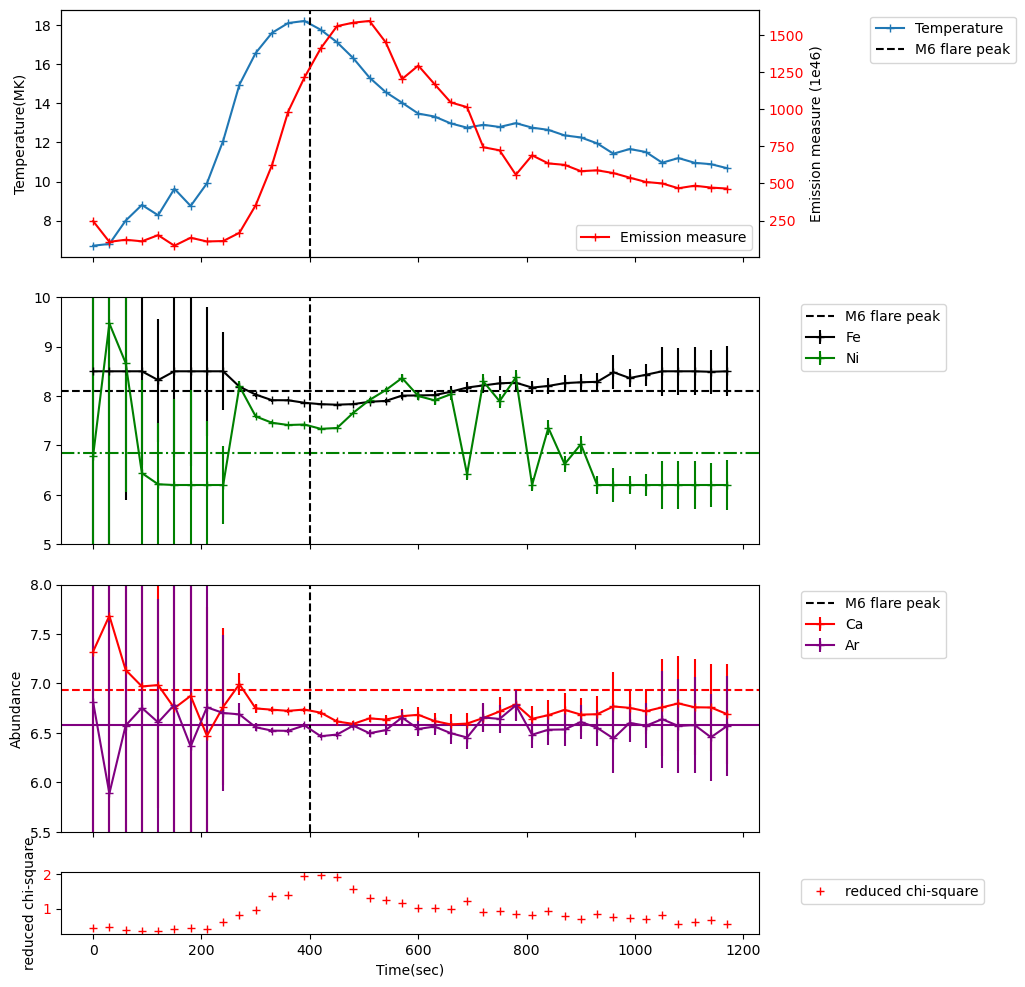

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits




fig,ax=plt.subplots(4,1,figsize=(9,12),gridspec_kw={'height_ratios':(4,4,4,1)},sharex=True)




ax[0].plot(time12,temperatur,'+',linestyle='-',label='Temperature')
ax[0].set_ylabel('Temperature(MK)')
ax[0].tick_params(axis='y')
ax[0].axvline(400,linestyle='--',color='black',label='M6 flare peak')
ax[0].legend(bbox_to_anchor=(1.15, 1), loc='upper left')
axs2=ax[0].twinx()
axs2.plot(time12,norm,'+',linestyle='-',color='r',label='Emission measure')
axs2.set_ylabel('Emission measure (1e46)')
axs2.tick_params(axis='y',labelcolor='r')
axs2.legend(loc='lower right')



ax[1].errorbar(time12,Fe_abun,yerr=Fe_err,fmt='+',linestyle='-',color='black',label='Fe')
ax[1].axhline(y=8.10,linestyle='--',color='black')

ax[1].errorbar(time12,Ni_abun,Ni_err,fmt='+',linestyle='-',label='Ni',color='green')
ax[1].axhline(y=6.84,linestyle='-.',color='green')
ax[1].axvline(400,linestyle='--',color='black',label='M6 flare peak')
ax[1].set_ylim(5,10)
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')



ax[2].errorbar(time12,Ca_abun,Ca_err,fmt='+',linestyle='-',color='r',label='Ca')
ax[2].axhline(y=6.93,linestyle='--',color='r')
ax[2].errorbar(time12,Ar_abun,Ar_err,fmt='+',linestyle='-',color='purple',label='Ar')
ax[2].axhline(y=6.58,linestyle='-',color='purple')
ax[2].set_ylabel('Abundance')
ax[2].axvline(400,linestyle='--',color='black',label='M6 flare peak')
ax[2].set_ylim(5.5,8)
ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#ax[3].errorbar(time12,Si_abun,yerr=Si_err,fmt='+',linestyle='-',color='black',label='Si')
#ax[3].axhline(y=8.10,linestyle='--',color='black')
#ax[3].errorbar(time12,S_abun,yerr=S_abun,fmt='+',linestyle='-',color='blue',label='S')
#ax[3].axhline(y=7.27,linestyle=':',color='blue')
#ax[3].axvline(400,linestyle='--',color='black',label='M6 flare peak')
#ax[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#ax[3].set_ylim(6,9)

ax[3].plot(time12,r_chi,'+',color='red',label='reduced chi-square')
ax[3].set_ylabel('reduced chi-square')
ax[3].set_xlabel('Time(sec)')
ax[3].tick_params(axis='y',labelcolor='red')
ax[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Al1_tr4_pi.png",dpi=600,bbox_inches='tight')
plt.show()


In [18]:
time12

[-150.0,
 -120.0,
 -90.0,
 -60.0,
 -30.0,
 0.0,
 30.0,
 60.0,
 90.0,
 120.0,
 150.0,
 180.0,
 210.0,
 240.0,
 270.0,
 300.0,
 330.0,
 360.0,
 390.0,
 420.0,
 450.0,
 480.0,
 510.0,
 540.0,
 570.0,
 600.0]